In [59]:
from fitting_lib import *
import pickle

In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
with open("qjetmass_zjets_gen.pkl", "rb") as f:
    output = pickle.load( f )

In [62]:
h = output['ptfrac_z_jet_reco']
hgen = output['ptfrac_z_jet_gen']

hlist = []
for i in range(h.axes[1].size):
    hlist.append(h[sum,i,:].values()) #Storing the histograms in numpy arrays
    

frac_values = h.axes[2].centers
binlength = frac_values[2] - frac_values[0]
print(len(hlist))

14


In [63]:
hmc_reco = output['ptfrac_z_jet_reco']


In [64]:
with open("qjetmass_zjets_reco_old.pkl", "rb") as f2:
    output = pickle.load( f2 )

In [41]:
h_reco = output['ptfrac_z_jet_reco']


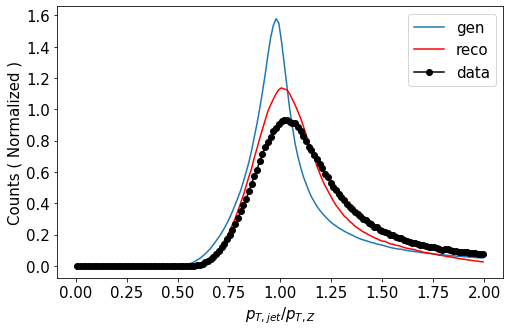

In [142]:
figure = plt.figure(figsize = (8,5))
plt.plot(frac_values,hgen[sum,sum,:].values()/(np.sum(hgen[sum,sum,:].values())*binlength),label = "gen")
plt.plot(frac_values,hmc_reco[sum,sum,:].values()/np.sum(hmc_reco[sum,sum,:].values()*binlength),label = "reco",color = 'red')
plt.plot(frac_values,h_reco[sum,sum,:].values()/np.sum(h_reco[sum,sum,:].values()*binlength),"o-",label = "data",color = 'black')


plt.xlabel(r"$p_{T,jet}/p_{T,Z}$")
plt.ylabel("Counts ( Normalized )")
plt.legend()
plt.savefig("Plots/distribution.png",dpi = 300)

In [65]:

histfit = Histfit(hlist, frac_values, binlength)
histfit.storeParameters()


/opt/conda/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


/opt/conda/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0.5, 0, 'Frac')

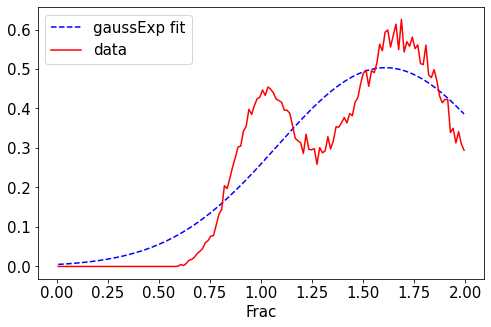

In [49]:
plt.rcParams.update({'font.size': 15})
histfit.showFitTail(3)
plt.xlabel("Frac")

Gauss


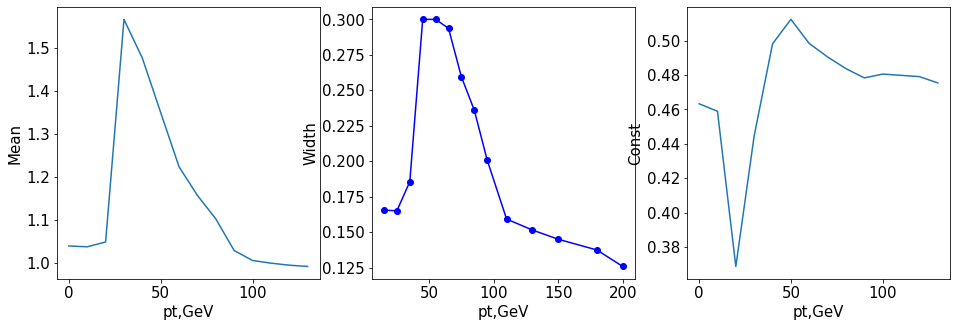

In [72]:
print('Gauss')
histfit.plotGaussparameters()
plt.savefig("Plots/sigma_compare.png",dpi = 300)

/opt/conda/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/conda/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/conda/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/conda/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/conda/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
 

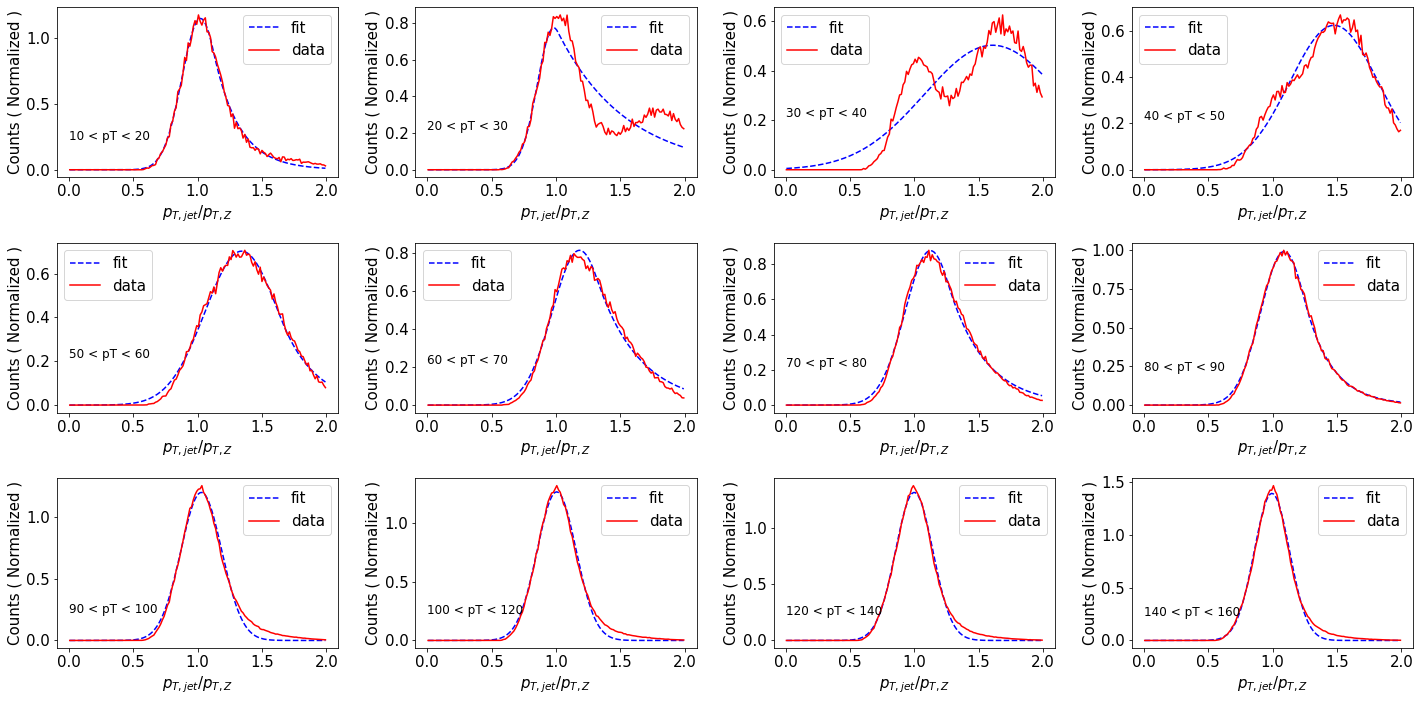

In [52]:
histfit.showFitTogether()


In [23]:
recowidth = histfit.gaussExpSigmaList
recowidth

array([0.15896531, 0.16091004, 0.1605913 , 0.15893775, 0.16245527,
       0.16499022, 0.16245516, 0.15954403, 0.15964019, 0.16026859,
       0.15275227, 0.14924221, 0.14666542])

In [71]:
recosigma = histfit.gaussWidthList

In [72]:
with open("qjetmass_zjets_gen.pkl", "rb") as f:
    output = pickle.load( f )

In [73]:
h = output['ptfrac_z_jet_gen']
hlist = []
for i in range(h.axes[1].size-1):
    hlist.append(h[sum,i:i+1,:].values()) #Storing the histograms in numpy arrays
    

frac_values = h.axes[2].centers
binlength = frac_values[2] - frac_values[0]

In [74]:
histfit = Histfit(hlist, frac_values, binlength)
histfit.storeParameters()

Gauss


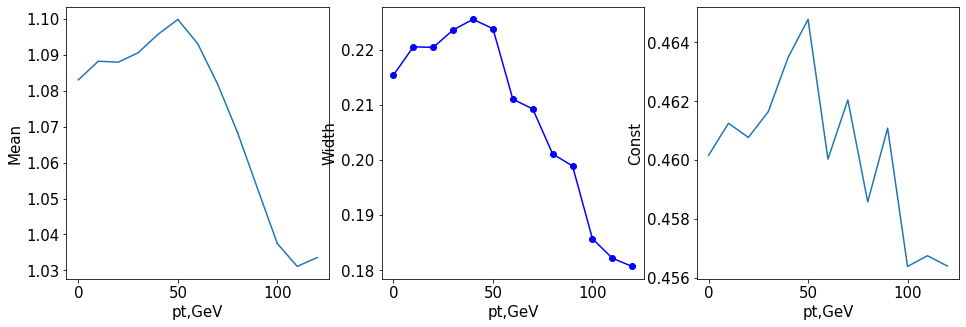

In [49]:
print('Gauss')
histfit.plotGaussparameters()

0.10735100800966425


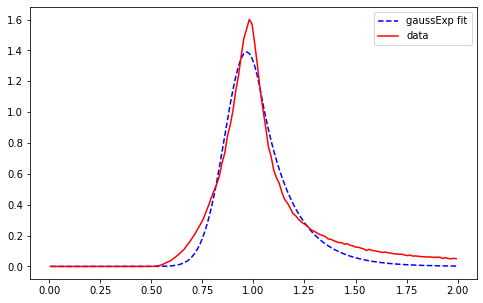

In [76]:
histfit.showFitTail(2)

In [77]:
genwidth = histfit.gaussWidthList
genwidth

array([0.12140629, 0.12195079, 0.12179498, 0.12189098, 0.12288619,
       0.1223561 , 0.12109609, 0.12153316, 0.12279044, 0.12443403,
       0.12618197, 0.1271458 , 0.13242147])

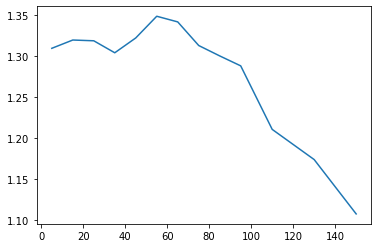

In [78]:
ratio_reco_over_gen = recowidth/genwidth
pt_axis = [5,15,25,35,45,55,65,75,85,95,110,130,150]
plt.plot(pt_axis, ratio_reco_over_gen)

0.1118435345518574
0.1118435345518574
0.1118435345518574
0.1118435345518574
0.1118435345518574
0.1118435345518574
0.1118435345518574
0.1118435345518574
0.1118435345518574
0.1118435345518574
0.1118435345518574
0.1118435345518574


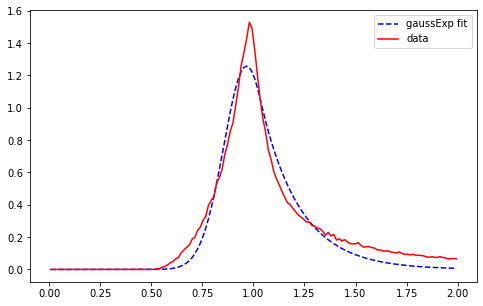

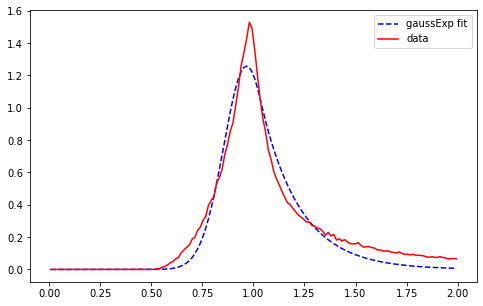

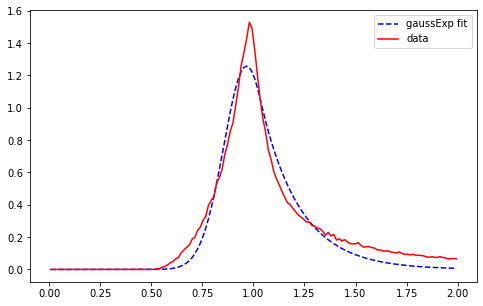

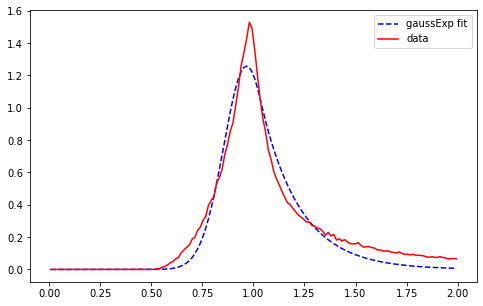

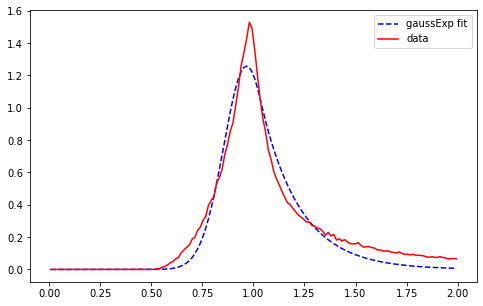

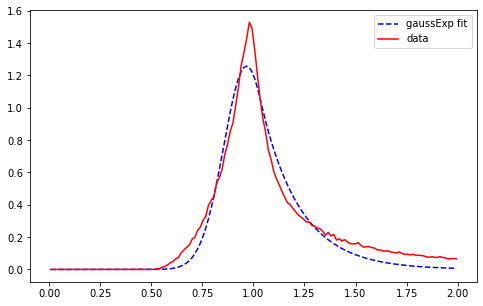

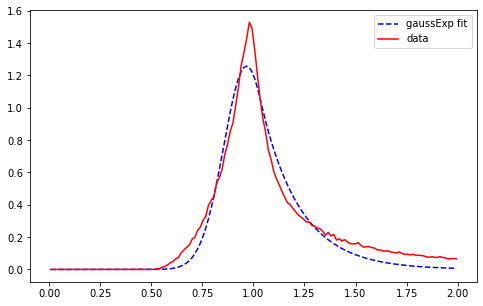

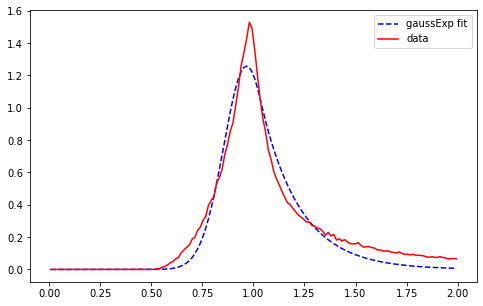

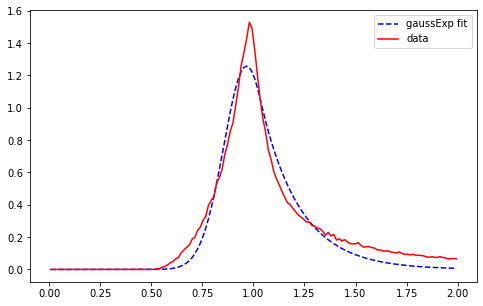

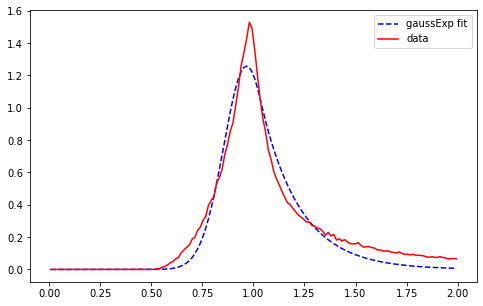

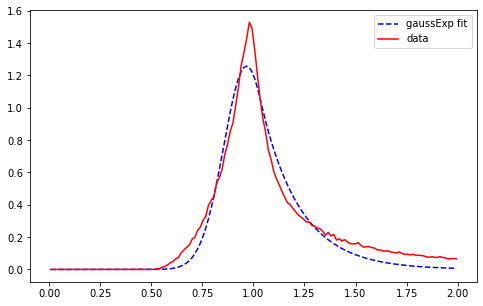

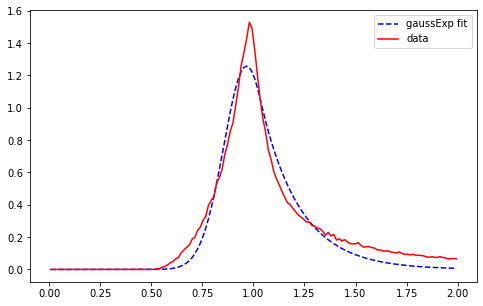

In [79]:
for i in range(12):
    histfit.showFitTail(12)

### In this part we do the same thing for other histograms

In [101]:
with open("qjetmass_zjets_gen.pkl", "rb") as f:
    output = pickle.load( f )

In [102]:
h = output['pt_jet_over_z_gen']
hlist = []
for i in range(h.axes[1].size):
    hlist.append(h[sum,i,:].values()) #Storing the histograms in numpy arrays
    

frac_values = h.axes[2].centers
binlength = frac_values[2] - frac_values[0]
print(len(hlist))

14


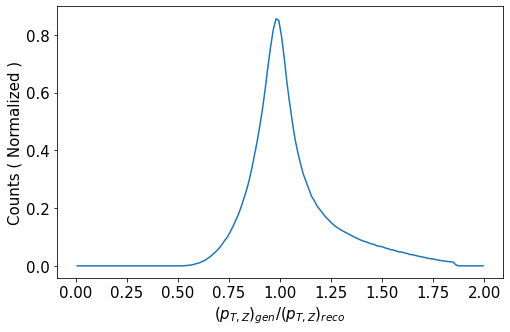

In [103]:
figure = plt.figure(figsize = (8,5))
plt.plot(frac_values,h[sum,sum,:].values()/(np.sum(hgen[sum,sum,:].values())*binlength),label = "gen")


plt.xlabel(r"$(p_{T,Z})_{gen}/(p_{T,Z})_{reco}$")
plt.ylabel("Counts ( Normalized )")
#plt.legend()
plt.savefig("Plots/distribution_zz.png",dpi = 300)

In [104]:

histfit = Histfit(hlist, frac_values, binlength)


/home/cms-jovyan/QJetMassUproot/fitting_lib.py:26: RuntimeWarning: invalid value encountered in divide
  self.histList[i] = histList[i]/(np.sum(histList[i])*self.binlength)


0.4885540448519526


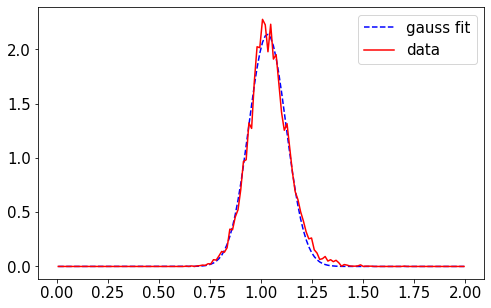

In [81]:
histfit.showFit(2)

In [105]:
histfit.storeParameters(skipFirst = True)

/opt/conda/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


0.5023393466488695
0.5073493656629909
0.507679946087775
0.5046483380906324
0.5032534446844956
0.4731486217716796
0.46462834667042924
0.4652656933921642
0.44798272171995074
0.4507484840293199
0.44737805664384345


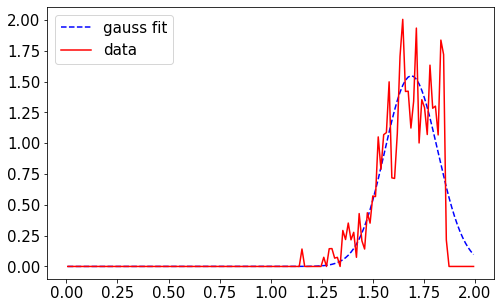

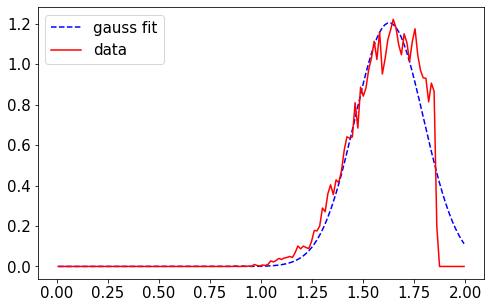

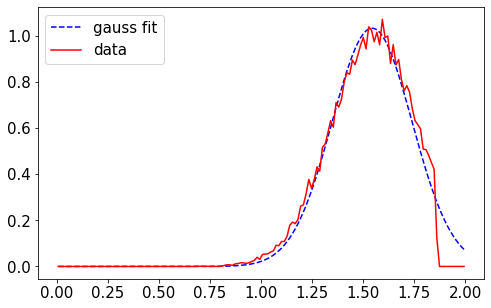

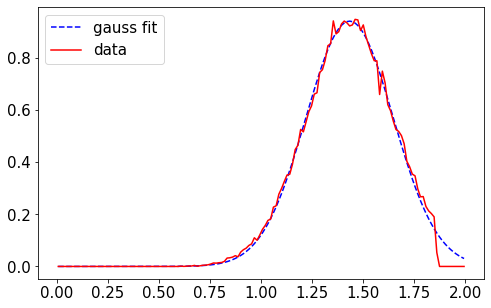

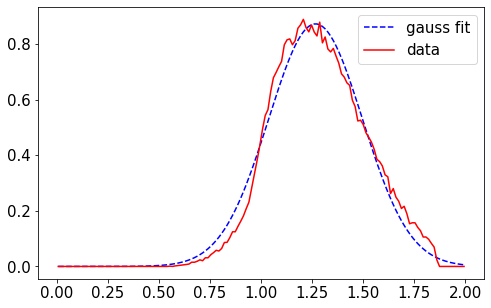

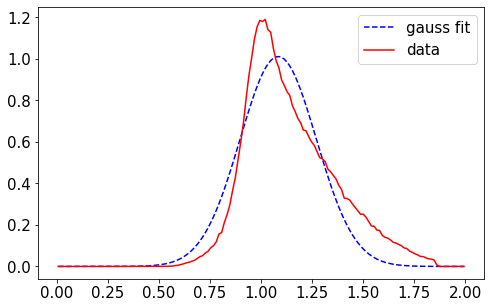

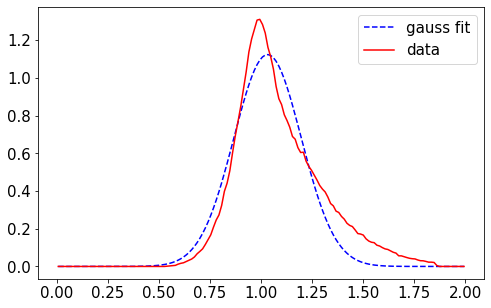

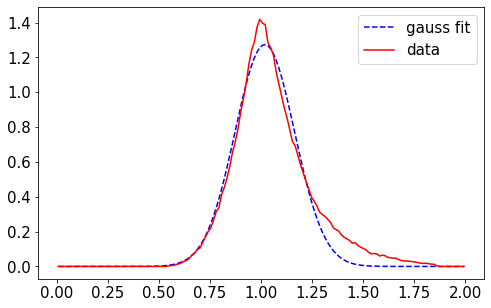

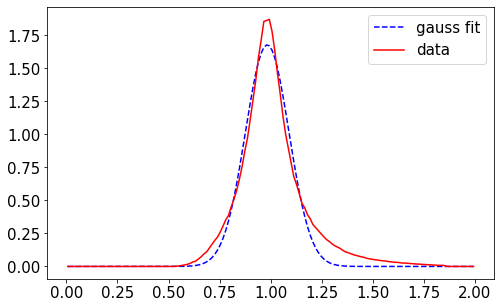

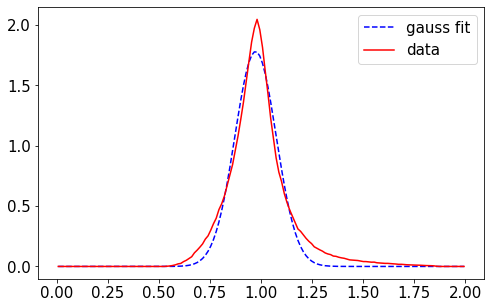

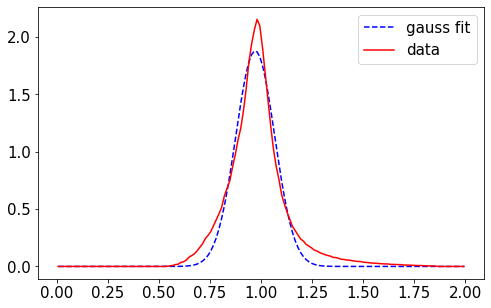

In [106]:
for i in range(1,12):
    histfit.showFit(i)

/opt/conda/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/conda/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


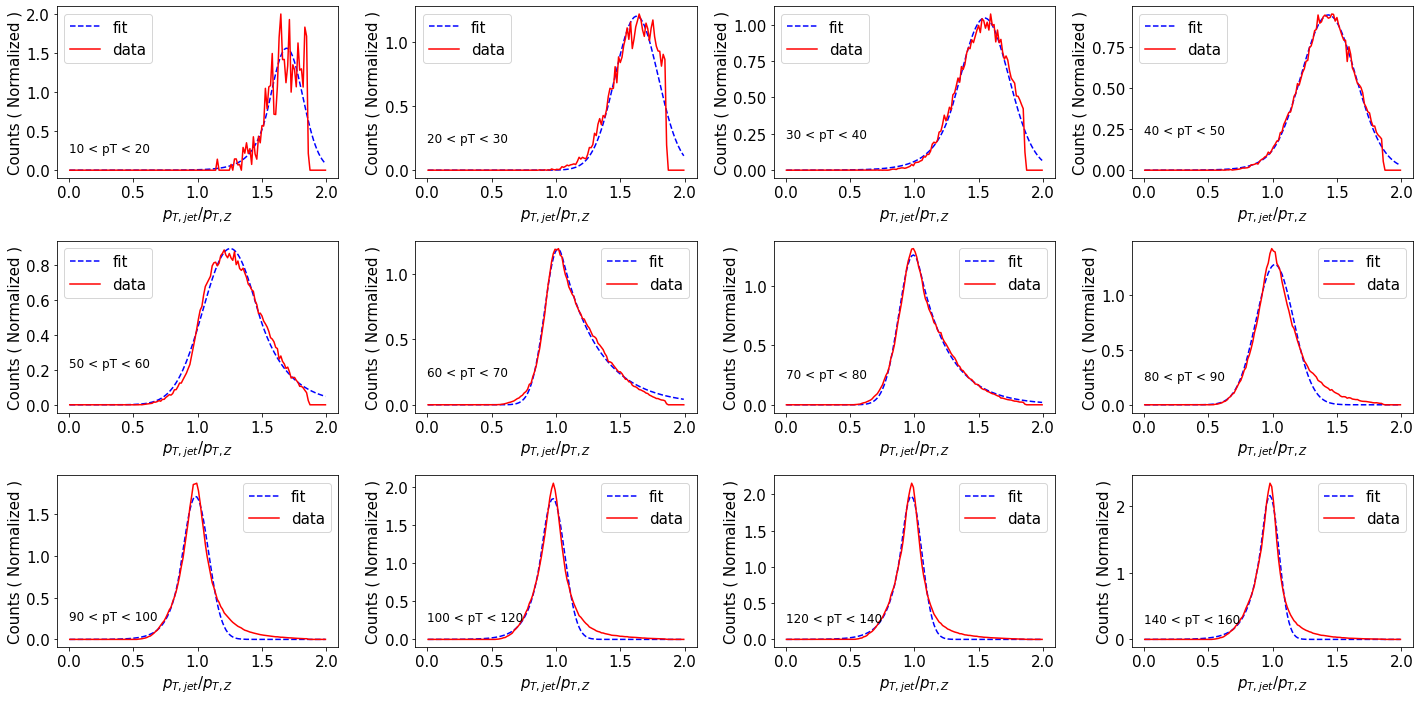

In [110]:
histfit.showFitTogether()

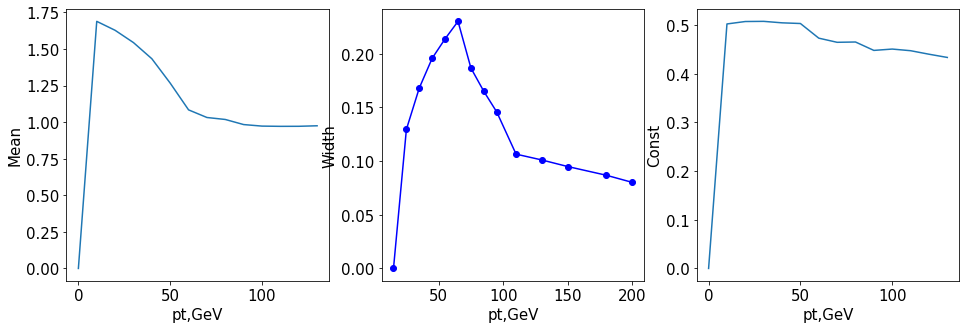

In [111]:
histfit.plotGaussparameters()

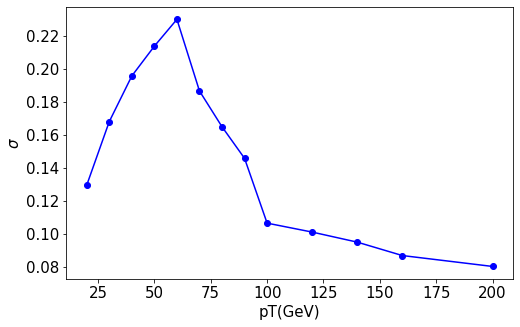

In [108]:
plt.figure(figsize = (8,5))
plt.plot(ptreco[1:14],histfit.gaussExWidthList[1:14],'bo-')
plt.xlabel('pT(GeV)')
plt.ylabel(r'$\sigma$')
plt.savefig('Plots/sigma_jer.png',dpi = 300)

In [88]:
ptreco = [10,20,30,40,50,60,70,80,90,100,120,140,160,200,7000]

In [43]:
pt_values = h.axes[1].centers
pt_values


array([  15.,   25.,   35.,   45.,   55.,   65.,   75.,   85.,   95.,
        110.,  130.,  150.,  180., 3600.])

In [45]:
h.axes[1].size

14